In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

In [2]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train.head(5)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
dataset_train.shape

(1258, 6)

In [4]:
training_set = dataset_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
sc_obj = MinMaxScaler(feature_range = (0,1))
trainig_set_scaled = sc_obj.fit_transform(training_set)
trainig_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [6]:
x_train = []
y_train = []
for i in range(60, 1258):
  x_train.append(trainig_set_scaled[i-60:i,0])
  y_train.append(trainig_set_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [7]:
print(x_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [8]:
x_train.shape ##exatamente 60 linhas a menos

(1198, 60)

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
print(x_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


In [11]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

es = EarlyStopping(monitor = "loss", mode = "min", verbose = 1, patience = 30)

model.fit(x_train, y_train, epochs = 500, batch_size = 32, callbacks = [es])

Epoch 1/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.1028
Epoch 2/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0067
Epoch 3/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0059
Epoch 4/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0045
Epoch 5/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0046
Epoch 6/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0051
Epoch 7/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0045
Epoch 8/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0047
Epoch 9/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0038
Epoch 10/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0049
Epoch 11/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0043
Epoch 12/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0043
Epoch 13/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0040
Epoch 14/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0035
Epoch 15/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - lo

In [13]:
#aprox 250 epochs ate atingir resultados satisfatorios

In [14]:
data_set_obj_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = data_set_obj_test.iloc[:,1:2].values

In [15]:
dataset_total= pd.concat((dataset_train['Open'], data_set_obj_test['Open']),axis=0)

In [16]:
inputs = dataset_total[len(dataset_total)-len(data_set_obj_test)-60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [17]:
inputs = inputs.reshape(-1,1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [19]:
inputs = sc_obj.transform(inputs)
x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc_obj.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


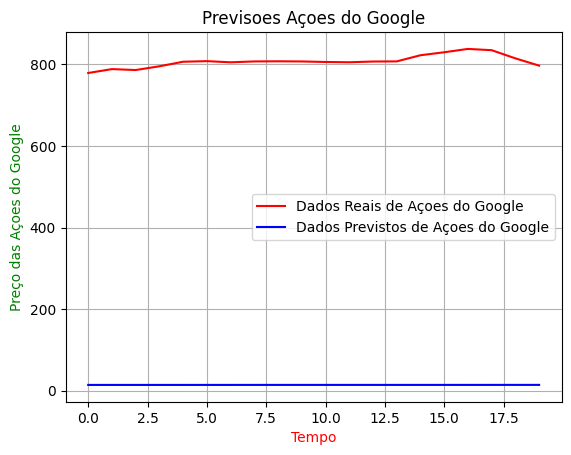

In [20]:
plt.plot(real_stock_price, color = "red", label = "Dados Reais de Açoes do Google")
plt.plot(predicted_stock_price, color = "blue", label = "Dados Previstos de Açoes do Google")
plt.title("Previsoes Açoes do Google")
plt.xlabel("Tempo", color = "red")
plt.ylabel("Preço das Açoes do Google", color = "green")
plt.grid(True)
plt.legend()
plt.show()